In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
no of unique values 7043
*****************
Male      3555
Female    3488
Name: gender, dtype: int64
no of unique values 2
*****************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
no of unique values 2
*****************
No     3641
Yes    3402
Name: Partner, dtype: int64
no of unique values 2
*****************
No     4933
Yes    2110
Name: Dependents, dtype: int64
no of unique values 2
*****************
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
no of unique values 73
*****************
Yes    6361
No      682
Name: PhoneService, dtype: int64
no of unique values 2
*****************
No                  3390
Yes                 2971
No phone service     

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

0

No null values or duplicated values are present in datset

# EDA

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

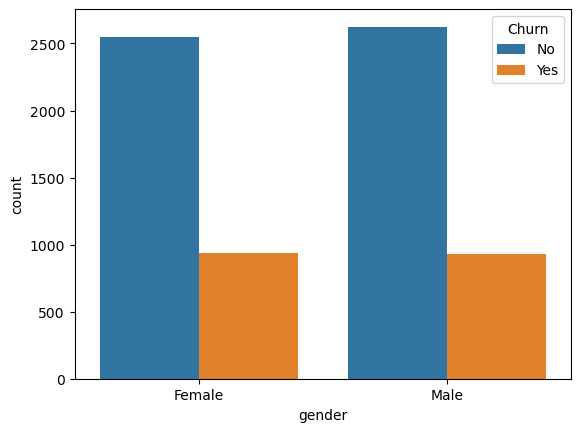

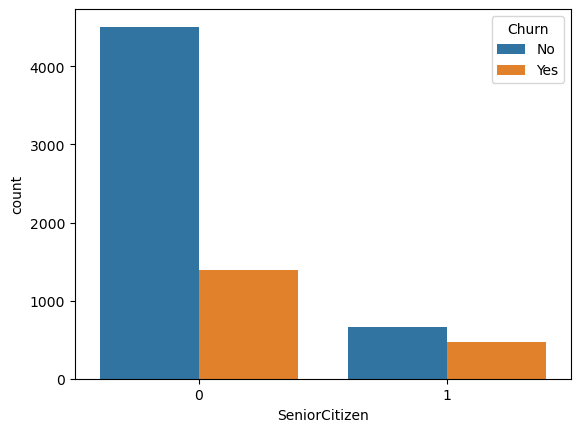

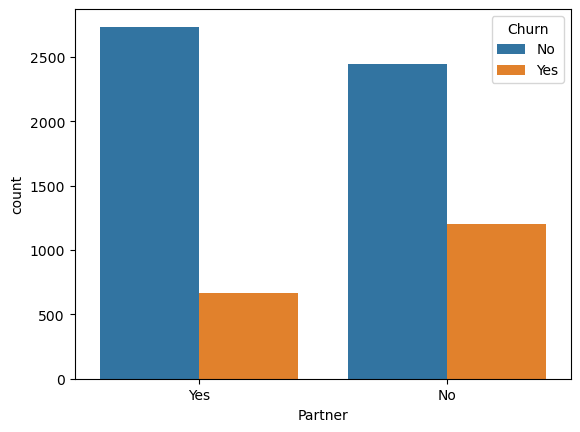

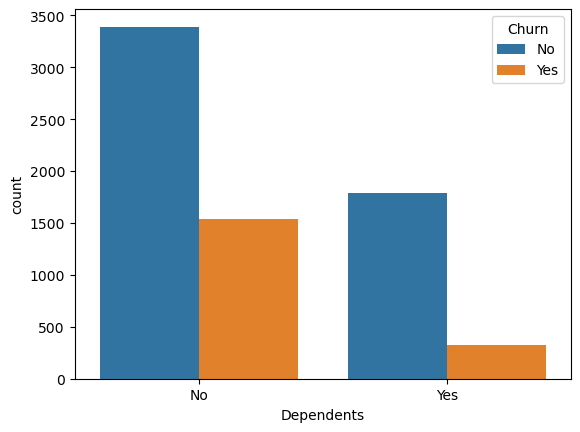

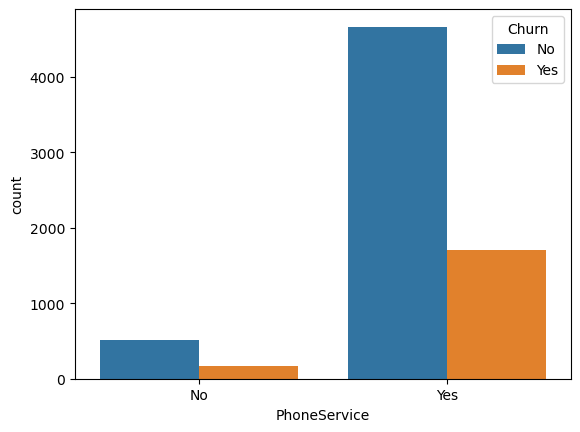

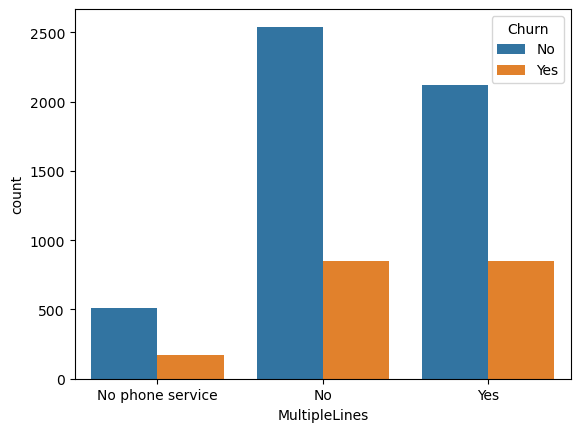

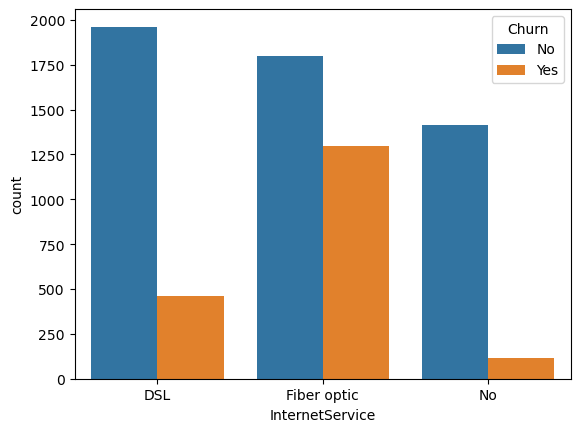

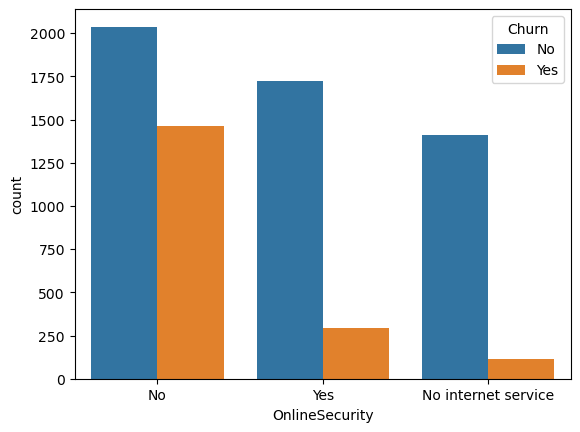

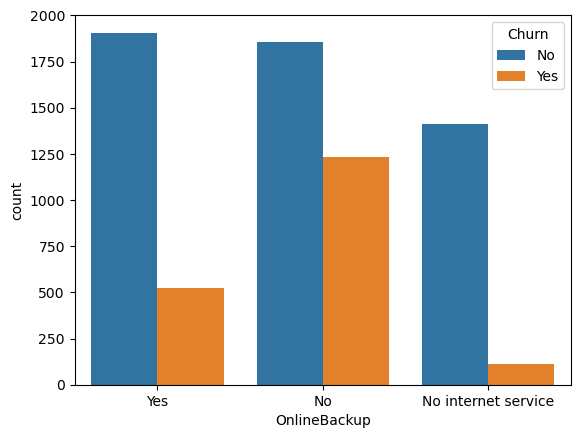

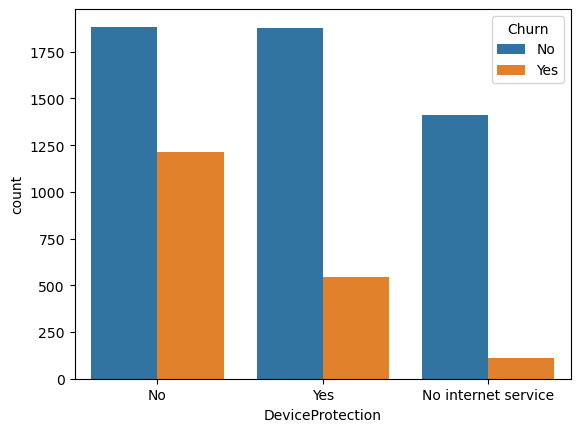

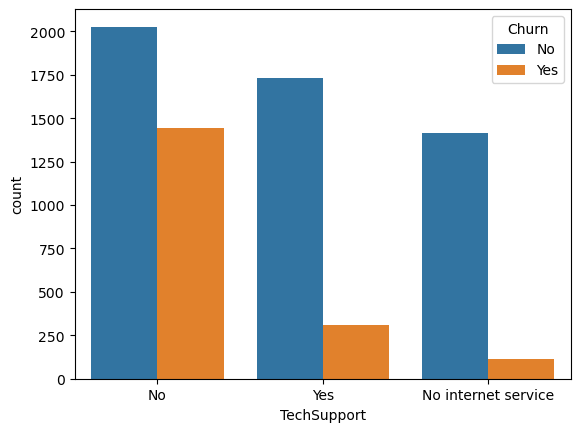

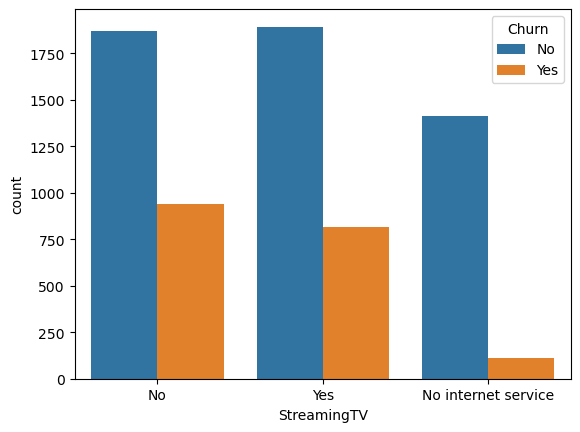

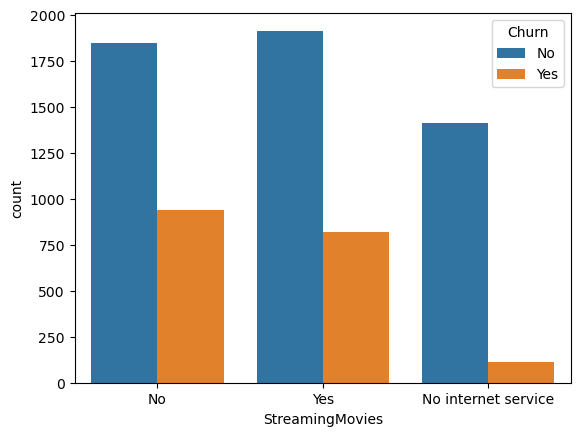

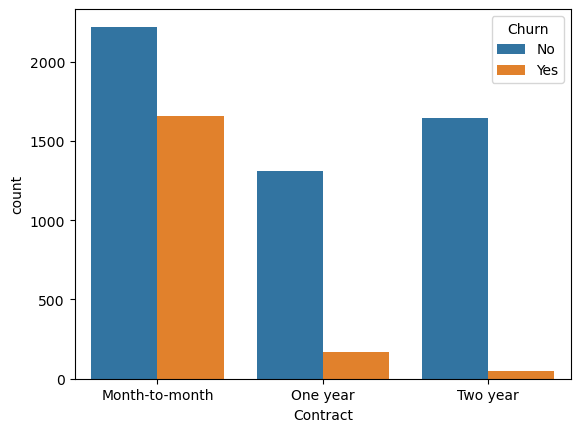

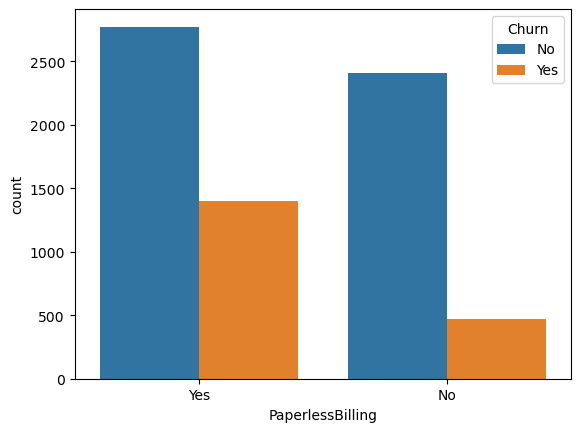

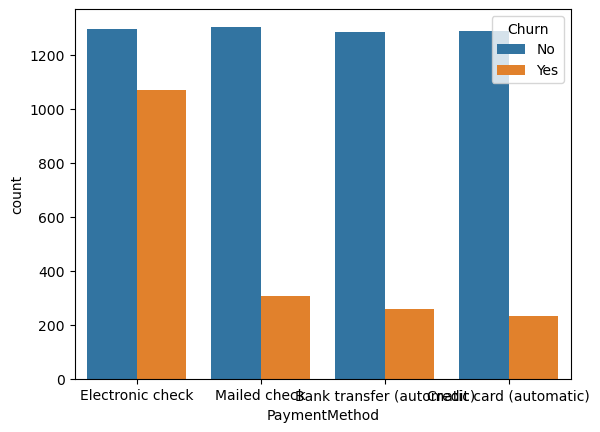

In [8]:
for i, x in enumerate(df.drop(columns=['customerID','Churn','MonthlyCharges','TotalCharges','tenure'], axis=1)):
    plt.figure(i)
    sns.countplot(data=df,hue='Churn',x=x)

### Inference
Male Female both have almost 50-50% chance of getting churned

Not a senior citizen have less churn percentage

Having a partner has more churn percentage as compared to not having a partner

Dependents are inversely proportional to partner

Having Fiber optic has the highest churn percentage among all internet service

No online security, no OnlineBackup, no DeviceProtection, no TechSupport creates more churning

One year contract customers are less likely to churn as compared to Month-to-Month

Electronic check payment method customers are most likely to churn among all payment methods

<AxesSubplot:xlabel='tenure', ylabel='count'>

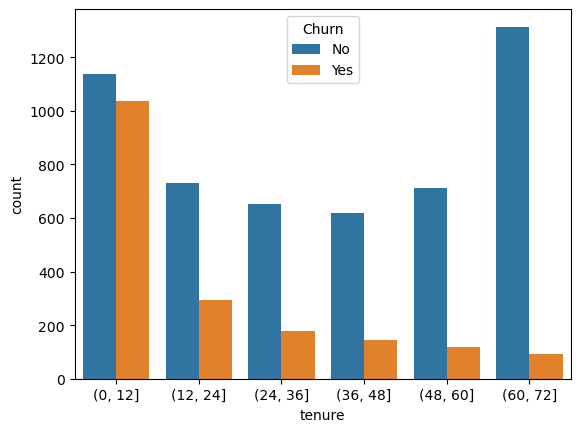

In [9]:
tenure_bins = pd.cut(df['tenure'], bins = range(0,73,12))
sns.countplot(data=df, x= tenure_bins, hue = 'Churn')

we can see that tenure above 60yrs are very less likely to churn whereas tenure below 12yrs has the highest churn rate which is close to 50%

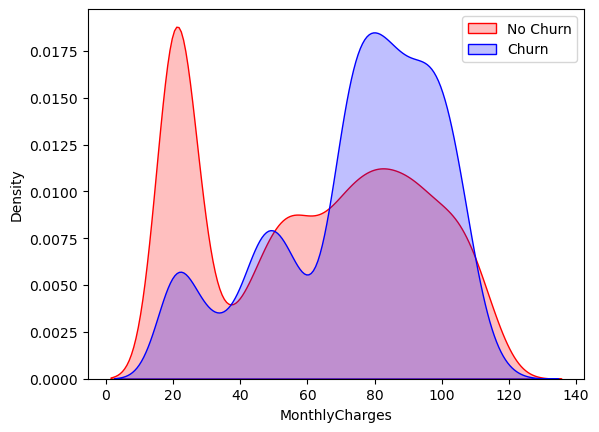

In [10]:
MonthlyCharge_churn = sns.kdeplot(data = df.MonthlyCharges[df['Churn']=="No"], color = "Red", shade = True)
MonthlyCharge_churn = sns.kdeplot(data = df.MonthlyCharges[df['Churn']=="Yes"], color = "Blue", shade = True)
MonthlyCharge_churn.legend(['No Churn', 'Churn'])

## Preparing the data

### converting categorical to numerical

In [11]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# Drpooing column with customer name
df.drop("customerID",axis=1, inplace=True)

In [14]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['SeniorCitizen']=le.fit_transform(df['SeniorCitizen'])
df['gender']=le.fit_transform(df['gender'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Churn']=le.fit_transform(df['Churn'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [16]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

<AxesSubplot:xlabel='TotalCharges', ylabel='count'>

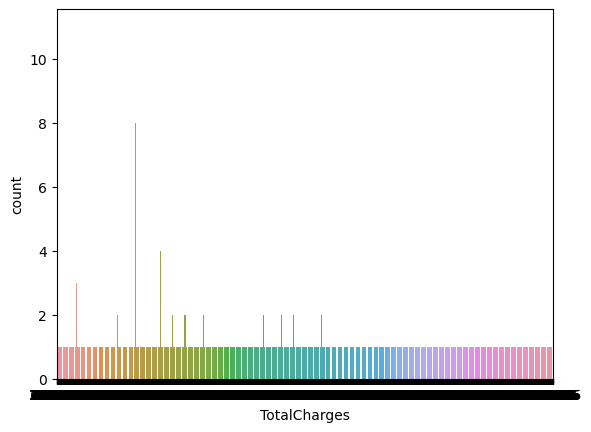

In [17]:
sns.countplot(data=df,x="TotalCharges")

In [18]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


## Outliers handling

In [20]:
z=np.abs(zscore(df.drop("TotalCharges", axis=1)))
dfn=df[(z<3).all(axis=1)]
dfn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


### Skewness Handling

In [21]:
dfn.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges        0.898862
Churn               1.053055
dtype: float64

In [22]:
from sklearn.preprocessing import power_transform

for i in dfn.drop("Churn",axis=1).columns:
    if abs(dfn[f'{i}'].skew())>0.5:
        dfn[f'{i}']=power_transform(dfn[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : SeniorCitizen
treated skewness for : Dependents
treated skewness for : Contract
treated skewness for : TotalCharges


In [23]:
dfn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,-0.441591,0,-0.653600,34,1,0,0,2,0,2,0,0,0,0.789436,0,3,56.95,0.223278,0
2,1,-0.441591,0,-0.653600,2,1,0,0,2,2,0,0,0,0,-0.888722,1,3,53.85,-1.399845,1
4,0,-0.441591,0,-0.653600,2,1,0,1,0,0,0,0,0,0,-0.888722,1,2,70.70,-1.264379,1
5,0,-0.441591,0,-0.653600,8,1,2,1,0,0,2,0,2,2,-0.888722,1,2,99.65,-0.378324,1
6,1,-0.441591,0,1.529987,22,1,2,1,0,2,0,0,2,0,-0.888722,1,1,89.10,0.248375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,-0.441591,0,-0.653600,72,1,0,2,1,1,1,1,1,1,1.343722,1,0,21.15,0.002333,0
7038,1,-0.441591,1,1.529987,24,1,2,0,2,0,2,2,2,2,0.789436,1,3,84.80,0.265265,0
7039,0,-0.441591,1,1.529987,72,1,2,1,0,2,2,0,2,2,0.789436,1,1,103.20,1.526073,0
7041,1,2.264538,1,-0.653600,4,1,2,1,0,0,0,0,0,0,-0.888722,1,3,74.40,-0.941050,1


In [24]:
dfn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
Churn               0
dtype: int64

In [25]:
dfn.dropna(inplace=True)

In [26]:
#Applying SMOTE

from imblearn.over_sampling import SMOTE
smt=SMOTE()
train_x,train_y=smt.fit_resample(dfn.drop("Churn",axis=1),dfn["Churn"])

### Scaling of Independent features

In [27]:
X=dfn.iloc[:,:-1]
y=dfn.iloc[:,-1]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rfc.fit(x_train,y_train)
   
    rfc_predict_test=rfc.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{accuracy_score(y_test,rfc_predict_test)}')
    
    print('\n')

At random state 0, The training accuracy is :-0.7867820613690008


At random state 1, The training accuracy is :-0.7915027537372148


At random state 2, The training accuracy is :-0.7899291896144768


At random state 3, The training accuracy is :-0.8111723052714398


At random state 4, The training accuracy is :-0.8001573564122738


At random state 5, The training accuracy is :-0.7844217151848938


At random state 6, The training accuracy is :-0.7977970102281668


At random state 7, The training accuracy is :-0.7797010228166797


At random state 8, The training accuracy is :-0.7726199842643587


At random state 9, The training accuracy is :-0.7946498819826908


At random state 10, The training accuracy is :-0.7985837922895358


At random state 11, The training accuracy is :-0.7828481510621558


At random state 12, The training accuracy is :-0.7899291896144768


At random state 13, The training accuracy is :-0.7859952793076318


At random state 14, The training accuracy is :-0.802517702

At random state 95, The training accuracy is :-0.8072383949645948


In [29]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=95)

In [30]:
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(5081, 19) (5081,)
(1271, 19) (1271,)


In [31]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

accuracy score for  LogisticRegression() is :  0.8198269079464988 
 [[848  90]
 [139 194]] 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       938
           1       0.68      0.58      0.63       333

    accuracy                           0.82      1271
   macro avg       0.77      0.74      0.75      1271
weighted avg       0.81      0.82      0.81      1271
 

Cross Validation Score is : [0.80235988 0.82185039 0.80314961 0.79232283 0.79232283]
Mean Score : 0.8024011102594477


accuracy score for  GaussianNB() is :  0.7773406766325728 
 [[727 211]
 [ 72 261]] 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84       938
           1       0.55      0.78      0.65       333

    accuracy                           0.78      1271
   macro avg       0.73      0.78      0.74      1271
weighted avg       0.82      0.78      0.79      1271
 

Cross Validation Score is : [0.77089479 0.753

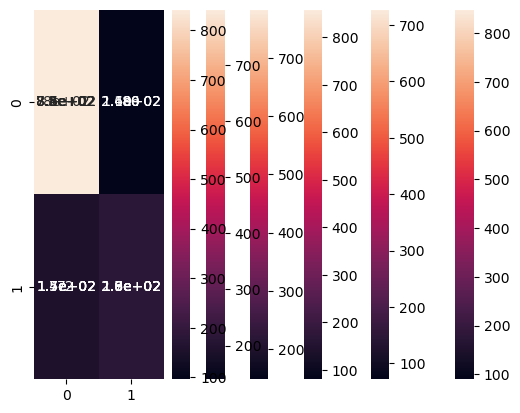

In [32]:
model=[lg,gnb,svc,dtc,knn,rfc]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

accuracy score for  LogisticRegression() is :  0.8198269079464988 

In [33]:
dict2={"penalty":['l1', 'l2', 'elasticnet'],"solver":["lbfgs", "newton-cg","newton-cholesky","sag","saga"],"fit_intercept":[True, False],"C":[5,10,15,20]}
gv=GridSearchCV(lg,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'C': 5, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}

In [34]:
lg_f=LogisticRegression(C=5,fit_intercept=True, penalty="l2", solver="lbfgs")
lg_f.fit(train_x,train_y)
prf=lg_f.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(lg_f,train_x,train_y,cv=4)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.8190401258851299
Cross Validation Score is : [0.80015736 0.81574803 0.78503937 0.78976378]
Mean Score : 0.797677134378659


In [35]:
import joblib
joblib.dump(lg_f,"lg_chrun.obj")

['lg_chrun.obj']

In [36]:
chrun_model=joblib.load('lg_chrun.obj')

In [37]:
result=chrun_model.predict(test_x)
print(accuracy_score(test_y,result))

0.8190401258851299
